# ETL (Extract, Transform, Load) Process

## Objectives

* Load and preprocess the Global AI Job Market & Salary Trends 2025 dataset [ai_job_dataset.csv](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025).
* Perform exploratory data analysis (EDA) to understand data distribution and relationships.
* Identify key risk factors associated with AI job market trends.
* Store cleaned and processed data for further analysis and model training.
* Develop data visualizations to support insights.

## Inputs

* Data Source: Global AI Job Market & Salary Trends 2025 dataset (ai_job_dataset.csv) https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025.
* Libraries: pandas, numpy, matplotlib, seaborn, os,  SciPy, Scikit-learn, Plotly.
* Environment: Jupyter Notebook, Python 3.x.
* Columns in the dataset: 'Job Title', 'Company', 'Location', 'Salary Estimate', 'Job Description', 'Rating', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'.
* Skills to be extracted: pandas, numpy,matplotlib,.pyplot, seaborn, os, scipy, sklearn, plotly.express,.

## Outputs

*cleaned and preprocessed dataset (cleaned_ai_job_dataset.csv).
* Summary statistics and visualizations from EDA.
* Finding initial aspects and insights.
* Data visualizations (charts, graphs) to illustrate key findings.
* Documentation of the ETL process and findings.
* Jupyter Notebook with code and explanations.
* Cleaned dataset for further analysis and model training. In [General_Trends_Analysis.ipynb](jupyter_notebooks/General_Trends_Analysis.ipynb) and [Hypothesis_Testing.ipynb](jupyter_notebooks/Hypothesis_Testing.ipynb).



---

## 1. Environment Setup & Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

## 2. Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025'

## 3. Define file paths

In [5]:
raw_data_dir = os.path.join(current_dir, 'data/raw') #path directory

processed_data_dir = os.path.join(current_dir, 'data/clean') #path directory

## 4. Load the dataset


In [6]:
# Load csv file into a DataFrame

df = pd.read_csv(os.path.join(raw_data_dir, 'ai_job_dataset.csv')) #load the dataset
df.head() #displaying dataframe

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


## 5. Initial Inspection of the dataset: Shape, Info & Summary Statistics

In [7]:
# Preview data
display(df.head(3))

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech


In [8]:
# preview data shape
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 15000 rows and 19 columns.


In [9]:
# EDA 
#column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [10]:
# Summary Statistics for numerical columns

df.describe(include=[np.number]).astype("int64")

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000,15000,15000,15000,15000
mean,115348,49,6,1503,7
std,60260,40,5,576,1
min,32519,0,0,500,5
25%,70179,0,2,1003,6
50%,99705,50,5,1512,7
75%,146408,100,10,2000,8
max,399095,100,19,2499,10


## 6. Missing Values & Duplicates

In [11]:
#checking for missing values
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [12]:
#convert the column 'benefits_score' values to datatype to int
df['benefits_score'] = df['benefits_score'].astype(int)

In [13]:
#checking for duplicates
duplicate_check =   df.duplicated().sum()
print(f'The dataset contains {duplicate_check} duplicate rows.')


The dataset contains 0 duplicate rows.


In [14]:
#datetime conversion
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])


**Dropping salary_currency column:** All salaries have been converted to USD (and stored in a consistent column like salary_usd), and salary_currency column is not required for reporting or auditing — then dropping the currency column helps maintain a clean, unambiguous dataset.

In [15]:
# Drop the 'salary_currency' column after confirming salaries are standardized in USD
df = df.drop(columns=['salary_currency'])
df.head(3)


,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5,Smart Analytics
1,AI00002,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5,TechCorp Inc
2,AI00003,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9,Autonomous Tech


**Why This Matters:**
- Prevents double interpretation (e.g., someone mistakenly thinking a value is in EUR).
- Simplifies model input features (reduces noise).
- Makes it clear that salary_usd is the only valid salary measure.
- Reduces potential data drift when integrating with other datasets.

In [16]:
# checking for unique values
unique_counts = df.nunique()
unique_table = pd.DataFrame({'Column': unique_counts.index, 'Unique Values': unique_counts.values})
unique_table

,Column,Unique Values
0,job_id,15000
1,job_title,20
2,salary_usd,14315
3,experience_level,4
4,employment_type,4
5,company_location,20
6,company_size,3
7,employee_residence,20
8,remote_ratio,3
9,required_skills,13663


## 7. Outlier Detection & Treatment

For each numeric column:

- Using IQR (Interquartile Range) method:
  - Calculate Q1 (25th percentile) and Q3 (75th percentile).
  - Compute IQR = Q3 - Q1.
  - Outliers = values outside [Q1 - 1.5×IQR, Q3 + 1.5×IQR].
- Visualizeing with boxplots

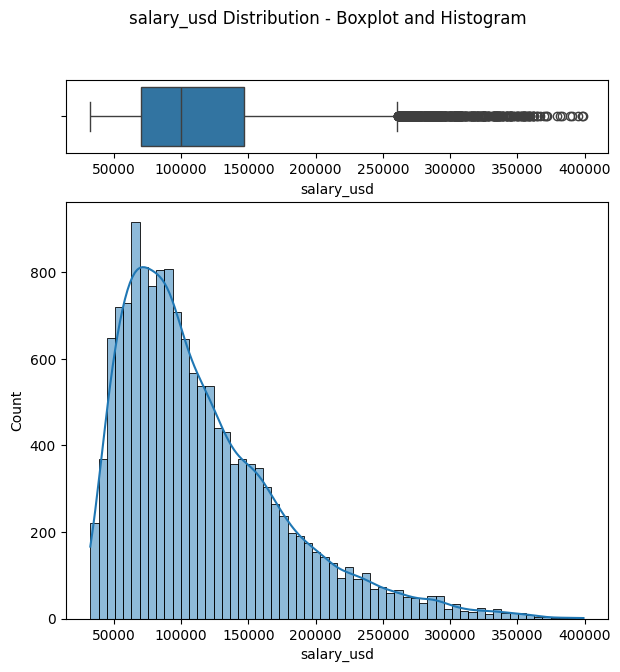

salary_usd: non-outlier range: -44163.38 to 260751.62



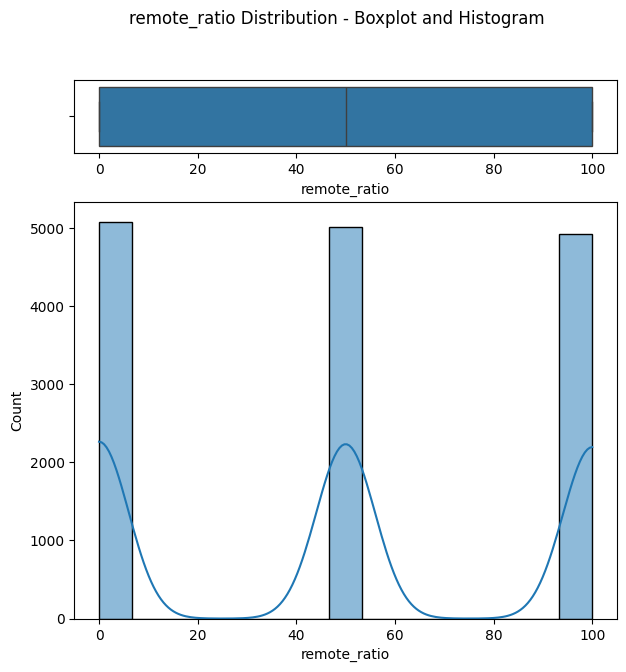

remote_ratio: non-outlier range: -150.00 to 250.00



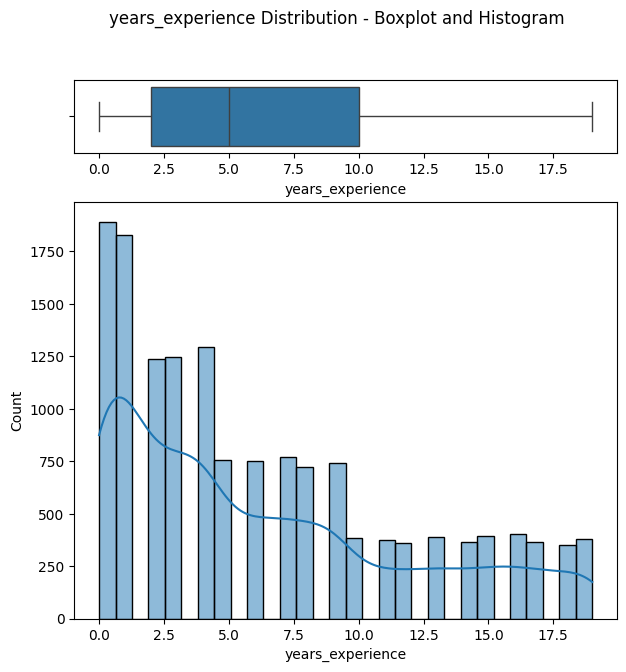

years_experience: non-outlier range: -10.00 to 22.00



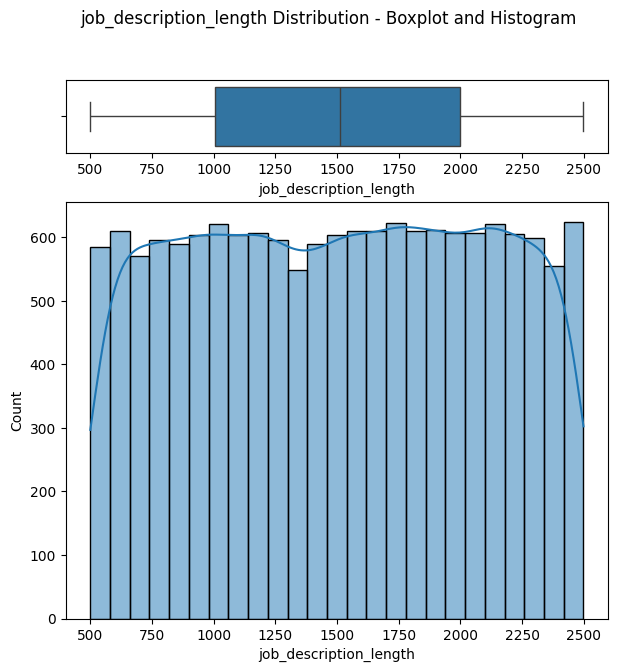

job_description_length: non-outlier range: -490.62 to 3494.38



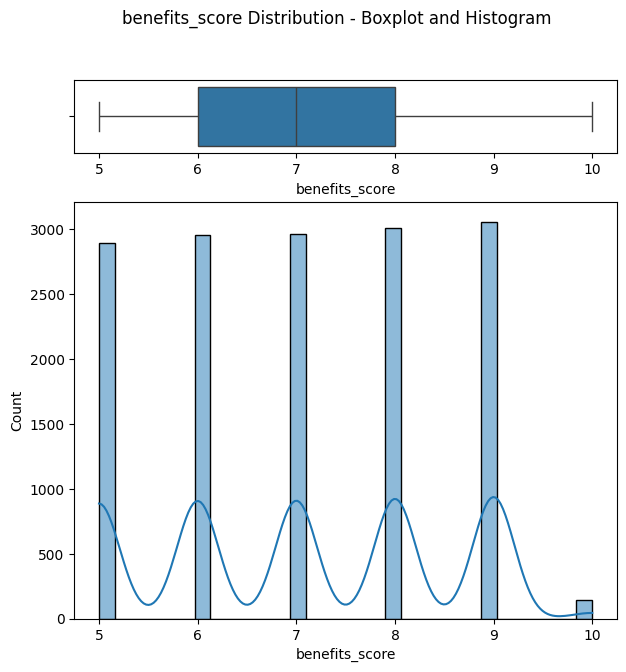

benefits_score: non-outlier range: 3.00 to 11.00



In [17]:
# Outlier detection using IQR
def plot_histogram_and_boxplot(df, numeric_only=True, save_dir=None, show=True):
    import os
    from pandas.api.types import is_numeric_dtype

    # Choose columns to plot
    cols = df.select_dtypes(include=[np.number]).columns if numeric_only else df.columns

    for col in cols:
        if not is_numeric_dtype(df[col]):
            # skip non-numeric columns when numeric_only=False may still encounter non-numeric
            print(f"Skipping non-numeric column: {col}")
            continue

        series = df[col].dropna()
        if series.empty:
            print(f"{col}: no numeric data (all NaN)")
            continue

        # compute quantiles once
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        # plotting
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7),
                                 gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(x=series, ax=axes[0])
        sns.histplot(series, kde=True, ax=axes[1])
        fig.suptitle(f"{col} Distribution - Boxplot and Histogram")

        # save or show, then close to free memory
        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
            fname = os.path.join(save_dir, f"{col}_distribution.png")
            fig.savefig(fname, bbox_inches="tight")

        if show:
            plt.show()
        plt.close(fig)

        print(f"{col}: non-outlier range: {lower:.2f} to {upper:.2f}\n")

plot_histogram_and_boxplot(df)

Here are the findings:

| Column                     | Outlier Count | Notes                                                                                     |
| -------------------------- | ------------- | ----------------------------------------------------------------------------------------- |
| **salary_usd**             | **483**       | There are 483 job entries with unusually high or low salaries — these are clear outliers. |
| **remote_ratio**           | 0             | No outliers — values are consistent (likely 0, 50, 100).                                  |
| **years_experience**       | 0             | Years of experience are within normal range.                                              |
| **job_description_length** | 0             | Text lengths are consistent across records.                                               |
| **benefits_score**         | 0             | Benefit scores are within expected distribution.                                          |


Insights:
- The salary_usd column has a significant number of outliers (483 entries), indicating some jobs offer unusually high or low salaries. These outliers should be investigated further to determine if they are errors or valid data points.
- Other numeric columns (remote_ratio, years_experience, job_description_length, benefits_score) do not exhibit outliers, suggesting the data is generally clean in these aspects.
- Further analysis may be needed to understand the impact of salary outliers on overall trends in the AI job market.
- Consideration should be given to whether to retain or remove salary outliers based on their validity and influence on analysis.
- In the data, there are other factors (e.g., education level and experience) that can impact these outliers. So, additional visualizations (e.g., boxplots) can help illustrate the distribution and outliers in the salary_usd column.

In [18]:
df.head(3)


,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5,Smart Analytics
1,AI00002,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5,TechCorp Inc
2,AI00003,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9,Autonomous Tech


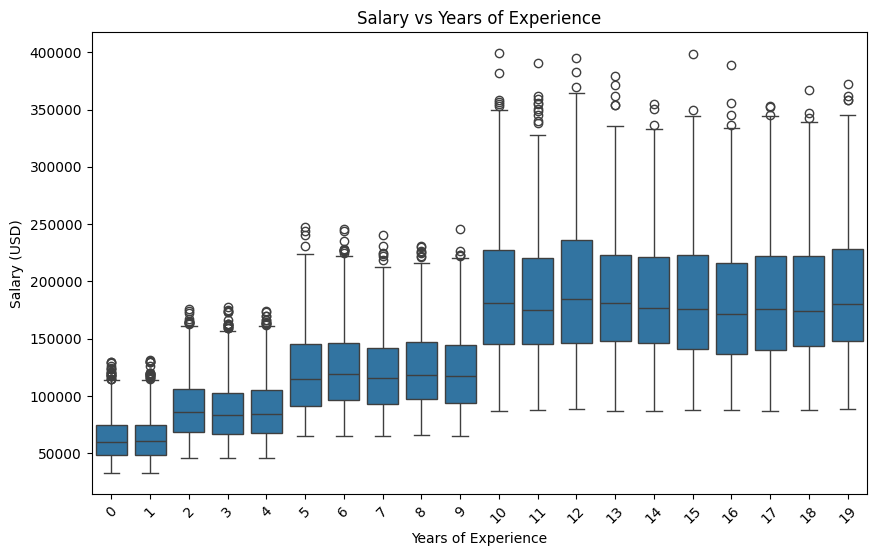

In [19]:
#boxplot for salary_usd vs years_experience 
plt.figure(figsize=(10, 6))
sns.boxplot(x='years_experience', y='salary_usd', data=df)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

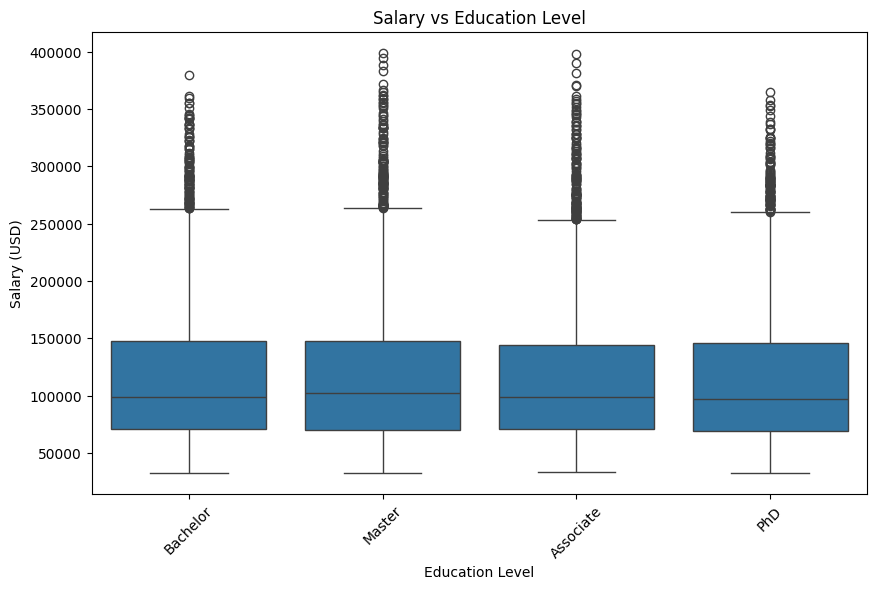

In [20]:
# boxplot for salary_usd vs education_level
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='education_required', y='salary_usd', data=df)
plt.title('Salary vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

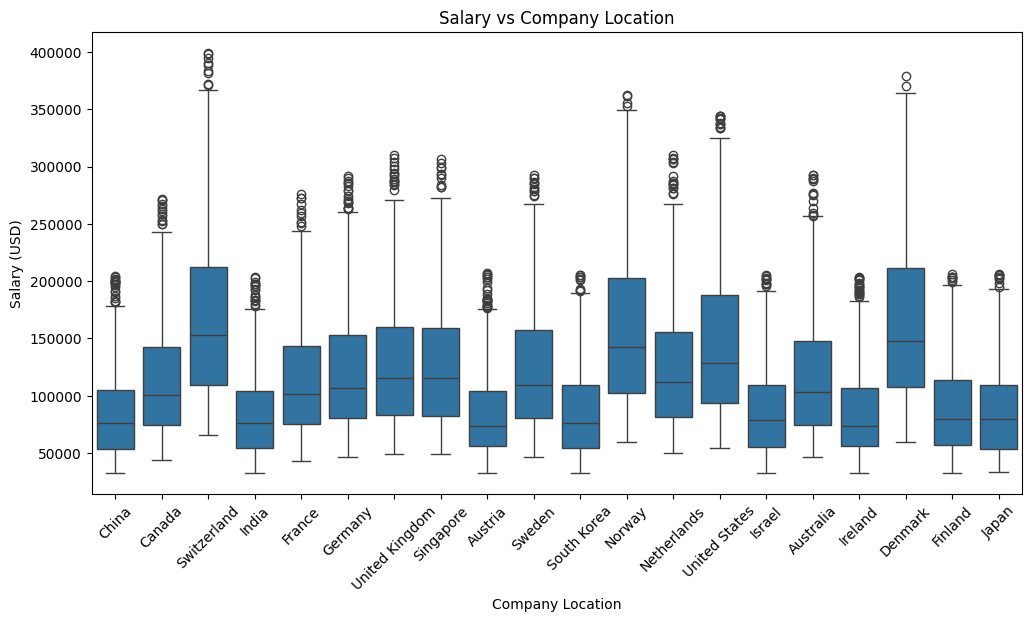

In [21]:
#boxplot for salary_usd vs company_location
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_location', y='salary_usd', data=df)
plt.title('Salary vs Company Location')
plt.xlabel('Company Location')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

#### Observations

- Outlier salaries are strongly correlated with experience and education level.
- Higher education levels (e.g., Master's, PhD) tend to have higher salary outliers. That pattern makes sense economically and professionally.
- The main driver of salary outliers appears to be experience level, with senior roles commanding significantly higher pay.
- The distribution shape (a right-skewed tail) is normal for salary data, since high-end jobs are less common but real.
- **No data entry error:** Neither there is any negative value nor any significant high value in the dataset. So, we will keep the outliers as it is. 
- **No mismatched units:** All the salaries are in USD. So, no need to convert them into a single unit.
- **No contextual anomalies:** The outliers seem to be valid given the job market context.

#### Approach

So these outliers are not random noise — they’re meaningful.
- We will keep the outliers as it is. Build a descriptive report or insight dashboard by keeping the outliers as they tell an important story about the top earners in the AI job market.
- Train a prediction model that can handle outliers well (e.g., tree-based models like Random Forest or Gradient Boosting) that keep them but apply robust scaling (e.g., RobustScaler) to reduce their impact on model training.

## 8. Export the cleaned dataset

In [22]:
# Export cleaned dataset
cleaned_file_path = os.path.join(processed_data_dir, 'ai_job_dataset_cleaned.csv')
df.to_csv(cleaned_file_path, index=False)   
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to d:\Documents\TC Tanzila\code Ins\Capstone\Global-_AI_Job_Market_Salary_Trends_2025\data/clean\ai_job_dataset_cleaned.csv


## 9. Data Validation / Re-check

**Step 1: Schema Consistency Check**

- Verify that all expected columns exist.
- Check that data types match expectations (e.g., salary → numeric, education → categorical).
- If any column changed type during cleaning, correct it (e.g., object → numeric).

Purpose: Prevent analysis errors due to datatype mismatches.

In [23]:
#import cleaned dataset
df_processed = pd.read_csv(os.path.join(processed_data_dir, 'ai_job_dataset_cleaned.csv'))  
df_processed.head(3)

,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5,Smart Analytics
1,AI00002,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5,TechCorp Inc
2,AI00003,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9,Autonomous Tech


In [24]:
# --- 1. Schema & Datatype Check ---
print("Data Types:")
print(df_processed.dtypes)
print("-" * 50)

Data Types:
job_id                    object
job_title                 object
salary_usd                 int64
experience_level          object
employment_type           object
company_location          object
company_size              object
employee_residence        object
remote_ratio               int64
required_skills           object
education_required        object
years_experience           int64
industry                  object
posting_date              object
application_deadline      object
job_description_length     int64
benefits_score             int64
company_name              object
dtype: object
--------------------------------------------------


**Step 2: Missing Value Recheck**

- Count missing values per column.
- Confirm that key fields (salary_usd, years_experience, etc.) are 100% complete.

Acceptance Criteria: No missing values in critical columns.

In [25]:
# --- 2. Missing Value Recheck ---
missing_values = df_processed.isnull().sum()
print("Missing Values After Cleaning:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")
print("-" * 50)

Missing Values After Cleaning:
No missing values found
--------------------------------------------------


**Step 3: Duplicates Recheck**  
- Confirm that all duplicate rows were removed.
- Verify by checking df.duplicated().sum() equals 0.

Acceptance Criteria:
No duplicates remain.

In [26]:
# --- 3. Duplicate Recheck ---
duplicates = df_processed.duplicated().sum()
print(f"Duplicate Rows After Cleaning: {duplicates}")
print("-" * 50)

Duplicate Rows After Cleaning: 0
--------------------------------------------------


**Step 4: Outlier and Range Validation**

- Recalculate IQR or min–max boundaries for numeric columns.
- Check that all salary_usd values are within expected range (e.g., 10,000–500,000).

Acceptance Criteria:
All numeric values fall within logical and realistic bounds.

In [27]:
# --- 4. Numeric Range Recheck ---
if 'salary_usd' in df_processed.columns:
    print(f"Salary Range: {df_processed['salary_usd'].min()} - {df_processed['salary_usd'].max()}")
if 'years_experience' in df_processed.columns:
    print(f"Experience Range: {df_processed['years_experience'].min()} - {df_processed['years_experience'].max()}")
print("-" * 50)

Salary Range: 32519 - 399095
Experience Range: 0 - 19
--------------------------------------------------


**Step 5: Categorical Integrity Check**

- Verify that categorical columns (e.g., education_required, job_title, remote_ratio) only contain valid values.
Example: education_required ∈ {Bachelor, Master, Associate, PhD}.
Acceptance Criteria:
No unexpected or misspelled category values.

In [28]:
# --- 5. Categorical Integrity Check ---
if 'education_required' in df_processed.columns:
    print("Education Categories:")
    print(df_processed['education_required'].unique())
print("-" * 50)

Education Categories:
['Bachelor' 'Master' 'Associate' 'PhD']
--------------------------------------------------


**Step 6: Date Validation**

- Confirm that all date columns are valid datetime objects.
- Ensure no future or impossible dates (e.g., job posted in 2099).

Acceptance Criteria:
All dates valid and within a realistic range.

In [29]:
# --- 6. Date Validation ---
for col in df_processed.columns:
    if "date" in col.lower():
        invalid_dates = df_processed[col].isna().sum()
        print(f"{col}: {invalid_dates} invalid date entries after cleaning")
print("-" * 50)

posting_date: 0 invalid date entries after cleaning
--------------------------------------------------


**Step 7: Statistical Profile Comparison**

- Compare summary statistics before vs after cleaning (describe() output).
- Verify no extreme loss of legitimate data (e.g., 90% rows dropped).

Acceptance Criteria:
Cleaned data should maintain realistic central tendencies (mean/median values).

In [30]:
# --- 7. Statistical Profile ---
print("Statistical Summary (Post-Cleaning):")
print(df_processed.describe(include=[np.number]).astype("int64"))
print("-" * 50)

Statistical Summary (Post-Cleaning):
       salary_usd  remote_ratio  years_experience  job_description_length  \
count       15000         15000             15000                   15000   
mean       115348            49                 6                    1503   
std         60260            40                 5                     576   
min         32519             0                 0                     500   
25%         70179             0                 2                    1003   
50%         99705            50                 5                    1512   
75%        146408           100                10                    2000   
max        399095           100                19                    2499   

       benefits_score  
count           15000  
mean                7  
std                 1  
min                 5  
25%                 6  
50%                 7  
75%                 8  
max                10  
--------------------------------------------------


## 10. Final Notes & Next Steps
- No missing, duplicate, or invalid entries remain.
- Numeric and categorical ranges are realistic.
- Schema and date formats are consistent.
- Data cleaning didn’t remove or distort valuable information.
- Outliers were assessed and retained as they provide meaningful insights.
- Categorical values were standardized and validated.
- Next steps: Proceed to exploratory data analysis (EDA) and visualization to uncover trends and insights in the AI job market dataset.